In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import csv
from tqdm import tqdm
import pandas as pd

import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

In [2]:
output_dir = os.path.join(".", "output_front_ppo")  # Path to the output directory
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

# Create an empty 3D array to store the combined data
combined_arr = np.empty((len(subdirs), 1000, 10))

# Loop through each subdirectory and load the CSV files
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")

    # Load the action and obs CSV files
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)

    # Concatenate the DataFrames horizontally
    combined_data = pd.concat([action_df, obs_df], axis=1)

    # Convert combined_data to a 3D array and assign it to combined_arr
    combined_arr[i-1] = np.reshape(combined_data.values, (1000, 10))

# Print the shape of combined_arr
print(combined_arr.shape)
combined_tensor = torch.from_numpy(combined_arr)

(10000, 1000, 10)


# VAE code -1

In [36]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(combined_tensor.float())

# Define the data loader
batch_size = 512  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters

input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]
hidden_dim1 = 64  
hidden_dim2 = 32  
hidden_dim3 = 8 
latent_dim = 2 
lr = 5e-5  # learning rate
n_epochs = 500
beta = 0.2
    

====> Epoch: 1 Average loss: 0.3923220432826451, Recon Loss: 0.0019901973009109498, KL Div: 1.951659162248884
====> Epoch: 2 Average loss: 0.3753199223109654, Recon Loss: 0.0019896099737712314, KL Div: 1.8666515241350445
====> Epoch: 3 Average loss: 0.3747777426583426, Recon Loss: 0.0019886709111077445, KL Div: 1.8639453386579241
====> Epoch: 4 Average loss: 0.37410555594308037, Recon Loss: 0.0019874188218797955, KL Div: 1.8605906459263393
====> Epoch: 5 Average loss: 0.3735974687848772, Recon Loss: 0.0019859451736722674, KL Div: 1.8580575910295758
====> Epoch: 6 Average loss: 0.3730824715750558, Recon Loss: 0.0019843130452292307, KL Div: 1.8554907575334822
====> Epoch: 7 Average loss: 0.37253421892438615, Recon Loss: 0.001982517600059509, KL Div: 1.8527584751674107
====> Epoch: 8 Average loss: 0.371947012765067, Recon Loss: 0.0019805521709578377, KL Div: 1.849832266671317
====> Epoch: 9 Average loss: 0.3713194808959961, Recon Loss: 0.001978466979094914, KL Div: 1.8467050519670758
====

====> Epoch: 75 Average loss: 0.28897511073521204, Recon Loss: 0.0003218121933085578, KL Div: 1.4432664533342634
====> Epoch: 76 Average loss: 0.2874825395856585, Recon Loss: 0.0003098961668355124, KL Div: 1.4358631896972656
====> Epoch: 77 Average loss: 0.2859875204903739, Recon Loss: 0.00029735774866172245, KL Div: 1.4284507489885603
====> Epoch: 78 Average loss: 0.2844903063092913, Recon Loss: 0.0002842390239238739, KL Div: 1.4210303257533483
====> Epoch: 79 Average loss: 0.28299425070626394, Recon Loss: 0.0002738322700772967, KL Div: 1.413602085658482
====> Epoch: 80 Average loss: 0.28150016457693916, Recon Loss: 0.0002666911653109959, KL Div: 1.4061673453194754
====> Epoch: 81 Average loss: 0.28000124904087614, Recon Loss: 0.00025587324585233415, KL Div: 1.3987268327985491
====> Epoch: 82 Average loss: 0.2785040533883231, Recon Loss: 0.0002476993650197983, KL Div: 1.391281742640904
====> Epoch: 83 Average loss: 0.2770067868913923, Recon Loss: 0.00024020639274801526, KL Div: 1.3838

====> Epoch: 148 Average loss: 0.1840008681161063, Recon Loss: 0.0001014323170695986, KL Div: 0.9194971444266183
====> Epoch: 149 Average loss: 0.1826961991446359, Recon Loss: 0.00010058510250278882, KL Div: 0.9129780578613281
====> Epoch: 150 Average loss: 0.18139776011875697, Recon Loss: 0.00010063378672514642, KL Div: 0.9064856218610491
====> Epoch: 151 Average loss: 0.1801029167175293, Recon Loss: 9.923312813043594e-05, KL Div: 0.9000183977399554
====> Epoch: 152 Average loss: 0.1788134264264788, Recon Loss: 9.909607363598688e-05, KL Div: 0.8935716465541295
====> Epoch: 153 Average loss: 0.177529114314488, Recon Loss: 9.851981752685139e-05, KL Div: 0.8871529671805245
====> Epoch: 154 Average loss: 0.1762490964617048, Recon Loss: 9.67708309846265e-05, KL Div: 0.8807616315569197
====> Epoch: 155 Average loss: 0.17497362300327846, Recon Loss: 9.477642178535461e-05, KL Div: 0.8743942173549107
====> Epoch: 156 Average loss: 0.17370771953037806, Recon Loss: 9.658230947596686e-05, KL Div:

Epoch [67/200] - Avg Loss: 0.0243
Epoch [68/200] - Avg Loss: 0.0243
Epoch [69/200] - Avg Loss: 0.0243
Epoch [70/200] - Avg Loss: 0.0243
Epoch [71/200] - Avg Loss: 0.0243
Epoch [72/200] - Avg Loss: 0.0242
Epoch [73/200] - Avg Loss: 0.0243
Epoch [74/200] - Avg Loss: 0.0243
Epoch [75/200] - Avg Loss: 0.0243
Epoch [76/200] - Avg Loss: 0.0243
Epoch [77/200] - Avg Loss: 0.0243
Epoch [78/200] - Avg Loss: 0.0244
Epoch [79/200] - Avg Loss: 0.0244
Epoch [80/200] - Avg Loss: 0.0242
Epoch [81/200] - Avg Loss: 0.0243
Epoch [82/200] - Avg Loss: 0.0244
Epoch [83/200] - Avg Loss: 0.0244
Epoch [84/200] - Avg Loss: 0.0243
Epoch [85/200] - Avg Loss: 0.0243
Epoch [86/200] - Avg Loss: 0.0244
Epoch [87/200] - Avg Loss: 0.0243
Epoch [88/200] - Avg Loss: 0.0244
Epoch [89/200] - Avg Loss: 0.0243
Epoch [90/200] - Avg Loss: 0.0244
Epoch [91/200] - Avg Loss: 0.0244
Epoch [92/200] - Avg Loss: 0.0243
Epoch [93/200] - Avg Loss: 0.0242
Epoch [94/200] - Avg Loss: 0.0244
Epoch [95/200] - Avg Loss: 0.0244
Epoch [96/200]

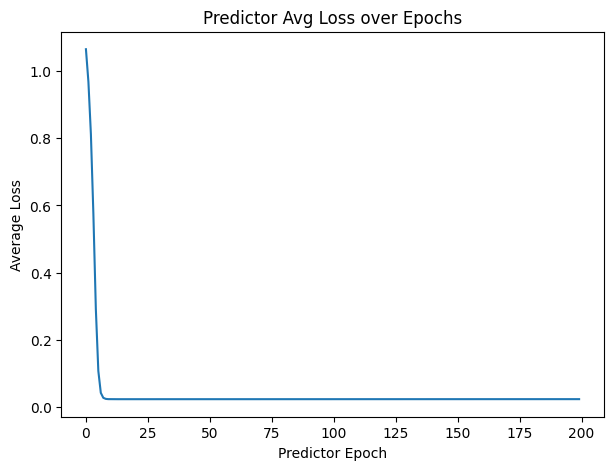

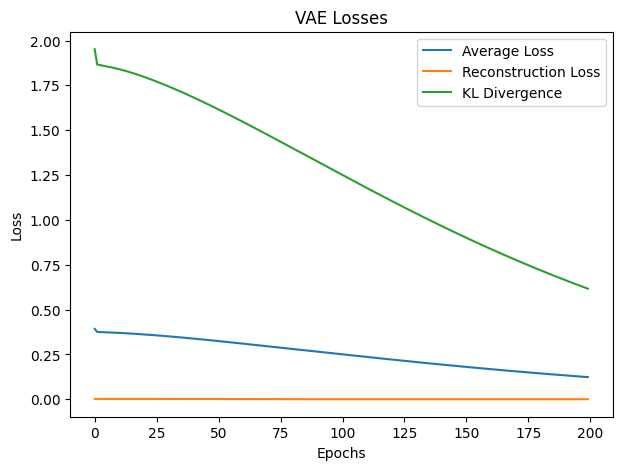

In [42]:
output_dim = combined_tensor.shape[1] * combined_tensor.shape[2]


class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var, h


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed
    
class IntegratedVAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, output_dim):
        super(IntegratedVAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)
        
        self.predictor = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, predict=False):
        mu, log_var, h = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        
        if predict:
            return self.predictor(z)
        
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var

class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
predictor = Predictor(latent_dim, output_dim)

model = IntegratedVAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, output_dim)
# Optimizer for VAE
optimizer = optim.RAdam(model.parameters(), lr=lr)

# Optimizer for predictor
lr_predictor = 0.05
optimizer_predictor = optim.RAdam(predictor.parameters(), lr=lr_predictor)

loss_fn = nn.MSELoss()

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []
n_epochs=200
n_epochs_predictor=200

# Training
for epoch in range(1, n_epochs + 1):
    model.train()
    model.predictor.eval()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    
    for i, batch in enumerate(train_loader):
        batch_data = batch[0]
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta * kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

    
predictor_losses = []
for epoch in range(n_epochs_predictor):
    model.eval()
    predictor.train()
    total_loss = 0
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_data = predictor(latent_vars)

        # 손실 함수를 계산할 때 예측된 전체 데이터와 실제 전체 데이터를 사용합니다.
        loss = loss_fn(predicted_data, data)
        total_loss += loss.item()

        optimizer_predictor.zero_grad()
        loss.backward()
        optimizer_predictor.step()

    avg_loss = total_loss / len(train_loader)
    predictor_losses.append(avg_loss)  # 추가된 부분: 계산된 avg_loss를 리스트에 추가
    print(f"Epoch [{epoch + 1}/{n_epochs_predictor}] - Avg Loss: {avg_loss:.4f}")

# 손실 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(predictor_losses)
plt.xlabel('Predictor Epoch')
plt.ylabel('Average Loss')
plt.title('Predictor Avg Loss over Epochs')
plt.show()

# VAE 손실 그래프 그리기
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('VAE Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for i in range(1000):
        for data_point in reshaped_data:
            if i ==0:
                input_data=torch.tensor(predictions).view(1, -1)
            else:
                input_data = torch.cat((input_data, torch.tensor(predictions).view(1, -1)), dim=1)
            prediction = model(data_point.unsqueeze(0), predict=True)
            predictions.append(prediction.squeeze().numpy())
            if i ==0:
                pass
            else:
                input_data = input_data[:, 10:]

predicted_actions_numpy = np.array(predictions)
print(predicted_actions_numpy.shape)
# Reshape the predicted_actions_numpy to (1000, 10)
predicted_actions_reshaped = predicted_actions_numpy

# Slice the first two columns to get the shape (1000, 2)
final_predicted_actions = predicted_actions_reshaped[:, :2]
final_predicted_actions = pd.DataFrame(final_predicted_actions)
print(final_predicted_actions.shape)
print(final_predicted_actions)
print(predicted_actions_reshaped.shape)

(1000, 10)
(1000, 2)
            0         1
0    0.194862 -0.009994
1    0.035945  0.103678
2    0.031088  0.103832
3    0.155896  0.106902
4    0.050162  0.171540
..        ...       ...
995  0.109035  0.078091
996  0.023308  0.091668
997  0.028176  0.102111
998  0.027881  0.200502
999  0.034609  0.101798

[1000 rows x 2 columns]
(1000, 10)


In [ ]:
# input_data = valid_dataset[0][0].view(1, 10000)
# prediction_steps = 10  # 예측할 단계 수

# predictions = []

# with torch.no_grad():
#     for i in range(1000):
#         for step in range(prediction_steps):
#             prediction = predict_next_frame(model, input_data[:, -10:])
#             predictions.append(prediction.squeeze().numpy())
#             input_data = torch.cat((input_data, prediction), dim=1)


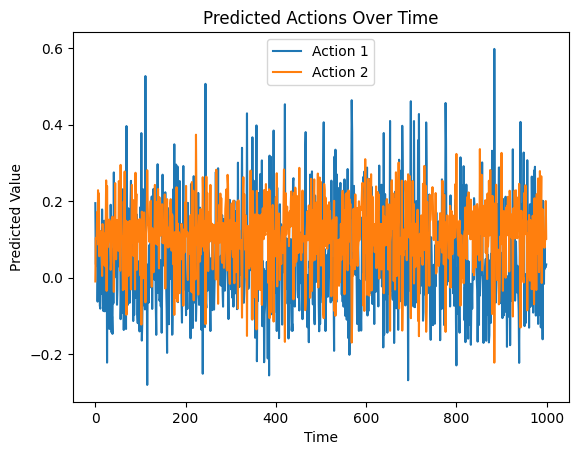

In [32]:
# import matplotlib.pyplot as plt

# # 예측을 numpy 배열로 변환
# predicted_actions_numpy = np.array(predictions)

# # 예측 플로팅
# plt.plot(predicted_actions_numpy[:, :2])
# plt.xlabel('Time')
# plt.ylabel('Predicted Value')
# plt.title('Predicted Actions Over Time')
# plt.legend(['Action 1', 'Action 2'])
# plt.show()



In [ ]:
# predicted_actions_numpy.shape

In [ ]:
# class IntegratedVAE(nn.Module):
#     def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, output_dim):
#         super(IntegratedVAE, self).__init__()

#         self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
#         self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)
        
#         self.predictor = nn.Sequential(
#             nn.Linear(latent_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, output_dim)
#         )

#     def reparameterize(self, mu, log_var):
#         std = torch.exp(log_var / 2)
#         eps = torch.randn_like(std)
#         return mu + eps * std

#     def forward(self, x, predict=False):
#         mu, log_var, h = self.encoder(x)
#         z = self.reparameterize(mu, log_var)
        
#         if predict:
#             return self.predictor(z)
        
#         x_reconstructed = self.decoder(z)
#         return x_reconstructed, mu, log_var

# class Predictor(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(Predictor, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, output_dim)
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         return self.fc3(x)
# predictor = Predictor(latent_dim, output_dim)

# model = IntegratedVAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim, output_dim)
# # Optimizer for VAE
# optimizer = optim.RAdam(model.parameters(), lr=lr)

# # Optimizer for predictor
# lr_predictor = 0.01
# optimizer_predictor = optim.RAdam(predictor.parameters(), lr=lr_predictor)

# loss_fn = nn.MSELoss()

# # Lists to store losses for each epoch
# avg_losses = []
# avg_recon_losses = []
# avg_kl_divs = []
# n_epochs=200
# n_epochs_predictor=500

# # Training
# for epoch in range(1, n_epochs + 1):
#     model.train()
#     model.predictor.eval()
#     train_loss = 0
#     total_recon_loss = 0
#     total_kl_div = 0
    
#     for i, batch in enumerate(train_loader):
#         batch_data = batch[0]
        
#         optimizer.zero_grad()

#         # Flatten the data
#         batch_data = batch_data.view(batch_data.size(0), -1)

#         reconstructed_batch, mu, log_var = model(batch_data)

#         # Loss: reconstruction loss + KL divergence
#         recon_loss = loss_fn(reconstructed_batch, batch_data)
#         kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
#         loss = recon_loss + beta * kl_divergence

#         loss.backward()
#         train_loss += loss.item()
#         total_recon_loss += recon_loss.item()
#         total_kl_div += kl_divergence.item()
#         optimizer.step()

#     avg_loss = train_loss / len(train_loader.dataset)
#     avg_recon_loss = total_recon_loss / len(train_loader.dataset)
#     avg_kl_div = total_kl_div / len(train_loader.dataset)
    
#     print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')
#     avg_losses.append(avg_loss)
#     avg_recon_losses.append(avg_recon_loss)
#     avg_kl_divs.append(avg_kl_div)
    
    
# n_epochs_predictor = 100
# predictor_losses = []
# for epoch in range(n_epochs_predictor):
#     model.eval()
#     predictor.train()
#     total_loss = 0
#     for batch in train_loader:
#         data = batch[:1000][0].view(1000, -1)
#         with torch.no_grad():
#             latent_vars, _, _ = model.encoder(data)
#         predicted_data = predictor(latent_vars)
    
#         true_actions = data[:,:2]
#         # 손실 함수를 계산할 때 예측된 전체 데이터와 실제 전체 데이터를 사용합니다.
#         loss = loss_fn(predicted_data, true_actions)
#         total_loss += loss.item()

#         optimizer_predictor.zero_grad()
#         loss.backward()
#         optimizer_predictor.step()

#     avg_loss = total_loss / len(train_loader)
#     predictor_losses.append(avg_loss)  # 추가된 부분: 계산된 avg_loss를 리스트에 추가
#     print(f"Epoch [{epoch + 1}/{n_epochs_predictor}] - Avg Loss: {avg_loss:.4f}")

# # 손실 그래프 그리기
# plt.figure(figsize=(7,5))
# plt.plot(predictor_losses)
# plt.xlabel('Predictor Epoch')
# plt.ylabel('Average Loss')
# plt.title('Predictor Avg Loss over Epochs')
# plt.show()

# # VAE 손실 그래프 그리기
# plt.figure(figsize=(7,5))
# plt.plot(avg_losses, label='Average Loss')
# plt.plot(avg_recon_losses, label='Reconstruction Loss')
# plt.plot(avg_kl_divs, label='KL Divergence')
# plt.title('VAE Losses')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [15]:
# output_dim = action_df.shape[1]

# with torch.no_grad():
#     mu, _, _ = model.encoder(valid_dataset[:1000][0].view(1000, -1))
#     predicted_valid_actions = predictor(mu)
    
# class Predictor(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(Predictor, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, output_dim)
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         return self.fc3(x)

# predictor = Predictor(latent_dim, output_dim)  # output_dim은 예측하고자 하는 행동의 차원
# optimizer = optim.Adam(predictor.parameters(), lr=0.001)
# loss_fn = nn.MSELoss()

# for epoch in range(n_epochs):
#     for batch in train_loader:
#         data = batch[0].view(len(batch[0]), -1)
#         with torch.no_grad():
#             latent_vars, _, _ = model.encoder(data)
#         predicted_actions = predictor(latent_vars)
        
#         # Assuming the actions are the first few columns of your data
#         true_actions = data[:, :2]
        
#         loss = loss_fn(predicted_actions, true_actions)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# with torch.no_grad():
#     mu, _, _ = model.encoder(valid_dataset[:][0].view(len(valid_dataset), -1))
#     predicted_valid_actions = predictor(mu)
# predicted_actions_numpy = predicted_valid_actions.numpy()
# final_predicted_actions = pd.DataFrame(predicted_actions_numpy)
# print(predicted_actions_numpy.shape)
# print(predicted_valid_actions.shape)

(1500, 2)
torch.Size([1500, 2])


In [21]:
# #####################3한프레임만

# predictions = []

# with torch.no_grad():
#     reshaped_data = valid_dataset[0][0].view(-1, 10000)
#     for data_point in reshaped_data:
#         prediction = model(data_point.unsqueeze(0), predict=True)
#         predictions.append(prediction.squeeze().numpy())

# predicted_actions_numpy = np.array(predictions)
# print(predicted_actions_numpy.shape)
# # Reshape the predicted_actions_numpy to (1000, 10)
# predicted_actions_reshaped = predicted_actions_numpy

# # Slice the first two columns to get the shape (1000, 2)
# final_predicted_actions = predicted_actions_reshaped[:, :2]
# final_predicted_actions = pd.DataFrame(final_predicted_actions)
# print(final_predicted_actions.shape)
# print(predicted_actions_reshaped)

(1, 10000)
(1, 2)
[[-0.0703069  -0.12194964 -0.11228212 ... -0.02389788  0.13933194
   0.04382132]]


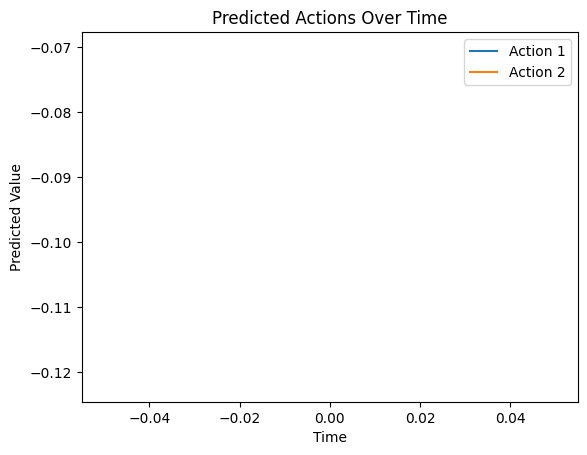

In [22]:
# import matplotlib.pyplot as plt

# # 예측을 numpy 배열로 변환
# predicted_actions_numpy = np.array(final_predicted_actions)

# # 예측 플로팅
# plt.plot(predicted_actions_numpy[:, :2])
# plt.xlabel('Time')
# plt.ylabel('Predicted Value')
# plt.title('Predicted Actions Over Time')
# plt.legend(['Action 1', 'Action 2'])
# plt.show()



Epoch [1/500] - Avg Loss: 0.9923
Epoch [2/500] - Avg Loss: 0.9919
Epoch [3/500] - Avg Loss: 0.9915
Epoch [4/500] - Avg Loss: 0.9911
Epoch [5/500] - Avg Loss: 0.9907
Epoch [6/500] - Avg Loss: 0.9902
Epoch [7/500] - Avg Loss: 0.9898
Epoch [8/500] - Avg Loss: 0.9894
Epoch [9/500] - Avg Loss: 0.9890
Epoch [10/500] - Avg Loss: 0.9887
Epoch [11/500] - Avg Loss: 0.9883
Epoch [12/500] - Avg Loss: 0.9879
Epoch [13/500] - Avg Loss: 0.9875
Epoch [14/500] - Avg Loss: 0.9871
Epoch [15/500] - Avg Loss: 0.9867
Epoch [16/500] - Avg Loss: 0.9864
Epoch [17/500] - Avg Loss: 0.9860
Epoch [18/500] - Avg Loss: 0.9856
Epoch [19/500] - Avg Loss: 0.9853
Epoch [20/500] - Avg Loss: 0.9849
Epoch [21/500] - Avg Loss: 0.9845
Epoch [22/500] - Avg Loss: 0.9842
Epoch [23/500] - Avg Loss: 0.9838
Epoch [24/500] - Avg Loss: 0.9835
Epoch [25/500] - Avg Loss: 0.9831
Epoch [26/500] - Avg Loss: 0.9827
Epoch [27/500] - Avg Loss: 0.9824
Epoch [28/500] - Avg Loss: 0.9820
Epoch [29/500] - Avg Loss: 0.9816
Epoch [30/500] - Avg Lo

Epoch [239/500] - Avg Loss: 0.1835
Epoch [240/500] - Avg Loss: 0.1781
Epoch [241/500] - Avg Loss: 0.1727
Epoch [242/500] - Avg Loss: 0.1676
Epoch [243/500] - Avg Loss: 0.1626
Epoch [244/500] - Avg Loss: 0.1577
Epoch [245/500] - Avg Loss: 0.1530
Epoch [246/500] - Avg Loss: 0.1485
Epoch [247/500] - Avg Loss: 0.1440
Epoch [248/500] - Avg Loss: 0.1397
Epoch [249/500] - Avg Loss: 0.1355
Epoch [250/500] - Avg Loss: 0.1314
Epoch [251/500] - Avg Loss: 0.1275
Epoch [252/500] - Avg Loss: 0.1237
Epoch [253/500] - Avg Loss: 0.1201
Epoch [254/500] - Avg Loss: 0.1165
Epoch [255/500] - Avg Loss: 0.1131
Epoch [256/500] - Avg Loss: 0.1097
Epoch [257/500] - Avg Loss: 0.1066
Epoch [258/500] - Avg Loss: 0.1034
Epoch [259/500] - Avg Loss: 0.1005
Epoch [260/500] - Avg Loss: 0.0976
Epoch [261/500] - Avg Loss: 0.0948
Epoch [262/500] - Avg Loss: 0.0921
Epoch [263/500] - Avg Loss: 0.0896
Epoch [264/500] - Avg Loss: 0.0870
Epoch [265/500] - Avg Loss: 0.0847
Epoch [266/500] - Avg Loss: 0.0822
Epoch [267/500] - Av

Epoch [474/500] - Avg Loss: 0.0243
Epoch [475/500] - Avg Loss: 0.0242
Epoch [476/500] - Avg Loss: 0.0242
Epoch [477/500] - Avg Loss: 0.0242
Epoch [478/500] - Avg Loss: 0.0243
Epoch [479/500] - Avg Loss: 0.0242
Epoch [480/500] - Avg Loss: 0.0243
Epoch [481/500] - Avg Loss: 0.0242
Epoch [482/500] - Avg Loss: 0.0243
Epoch [483/500] - Avg Loss: 0.0243
Epoch [484/500] - Avg Loss: 0.0243
Epoch [485/500] - Avg Loss: 0.0242
Epoch [486/500] - Avg Loss: 0.0242
Epoch [487/500] - Avg Loss: 0.0243
Epoch [488/500] - Avg Loss: 0.0242
Epoch [489/500] - Avg Loss: 0.0242
Epoch [490/500] - Avg Loss: 0.0243
Epoch [491/500] - Avg Loss: 0.0243
Epoch [492/500] - Avg Loss: 0.0243
Epoch [493/500] - Avg Loss: 0.0243
Epoch [494/500] - Avg Loss: 0.0242
Epoch [495/500] - Avg Loss: 0.0243
Epoch [496/500] - Avg Loss: 0.0243
Epoch [497/500] - Avg Loss: 0.0243
Epoch [498/500] - Avg Loss: 0.0243
Epoch [499/500] - Avg Loss: 0.0243
Epoch [500/500] - Avg Loss: 0.0242


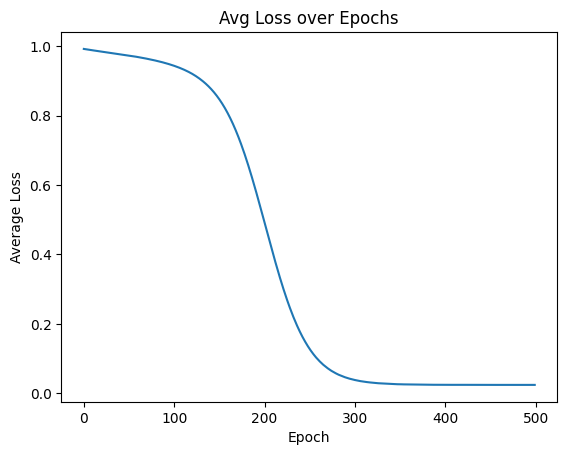

(1, 10000)
(1000, 2)


In [70]:
output_dim = combined_tensor.shape[1] * combined_tensor.shape[2]

with torch.no_grad():
    mu, _, _ = model.encoder(train_dataset[:][0].view(len(train_dataset), -1))
    
class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

predictor = Predictor(latent_dim, output_dim)
optimizer = optim.SGD(predictor.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
    
n_epochs = 500
losses = []  # 추가된 부분: 각 epoch별 손실을 저장할 리스트

for epoch in range(n_epochs):
    total_loss = 0
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_data = predictor(latent_vars)
        
        # 손실 함수를 계산할 때 예측된 전체 데이터와 실제 전체 데이터를 사용합니다.
        loss = loss_fn(predicted_data, data)
        total_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)  # 추가된 부분: 계산된 avg_loss를 리스트에 추가
    print(f"Epoch [{epoch + 1}/{n_epochs}] - Avg Loss: {avg_loss:.4f}")

# 추가된 부분: 손실 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Avg Loss over Epochs')
plt.show()

predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for data_point in reshaped_data:
        mu, _, _ = model.encoder(data_point.unsqueeze(0))
        prediction = predictor(mu)
        predictions.append(prediction.squeeze().numpy())

predicted_data_numpy = np.array(predictions)
print(predicted_data_numpy.shape)
predicted_data_numpy = predicted_data_numpy.reshape(1000,10)
final_predicted_actions = predicted_data_numpy[:, :2]
print(final_predicted_actions.shape)


replay(pd.DataFrame(predicted_data_numpy))

In [58]:
output_dim = combined_tensor.shape[1] * combined_tensor.shape[2]

with torch.no_grad():
    mu, _, _ = model.encoder(train_dataset[:][0].view(len(train_dataset), -1))
    
class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

predictor = Predictor(latent_dim, output_dim)
optimizer = optim.SGD(predictor.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
    
n_epochs = 500
losses = []  # 추가된 부분: 각 epoch별 손실을 저장할 리스트

for epoch in range(n_epochs):
    total_loss = 0
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_data = predictor(latent_vars)
        
        # 손실 함수를 계산할 때 예측된 전체 데이터와 실제 전체 데이터를 사용합니다.
        loss = loss_fn(predicted_data, data)
        total_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)  # 추가된 부분: 계산된 avg_loss를 리스트에 추가
    print(f"Epoch [{epoch + 1}/{n_epochs}] - Avg Loss: {avg_loss:.4f}")

# 추가된 부분: 손실 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Avg Loss over Epochs')
plt.show()

predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for data_point in reshaped_data:
        mu, _, _ = model.encoder(data_point.unsqueeze(0))
        prediction = predictor(mu)
        predictions.append(prediction.squeeze().numpy())

predicted_data_numpy = np.array(predictions)
final_predicted_actions = predicted_data_numpy[:, :2]
print(predicted_data_numpy.shape)
predicted_data_numpy = predicted_data_numpy.reshape(1000,10)
final_predicted_actions = predicted_data_numpy[:, :2]
print(final_predicted_actions.shape)


replay(pd.DataFrame(predicted_data_numpy))

Epoch [1/500] - Avg Loss: 0.9926
Epoch [2/500] - Avg Loss: 0.9922
Epoch [3/500] - Avg Loss: 0.9918
Epoch [4/500] - Avg Loss: 0.9914
Epoch [5/500] - Avg Loss: 0.9910
Epoch [6/500] - Avg Loss: 0.9906
Epoch [7/500] - Avg Loss: 0.9902
Epoch [8/500] - Avg Loss: 0.9898
Epoch [9/500] - Avg Loss: 0.9894
Epoch [10/500] - Avg Loss: 0.9891
Epoch [11/500] - Avg Loss: 0.9887
Epoch [12/500] - Avg Loss: 0.9883
Epoch [13/500] - Avg Loss: 0.9880
Epoch [14/500] - Avg Loss: 0.9876
Epoch [15/500] - Avg Loss: 0.9872
Epoch [16/500] - Avg Loss: 0.9869
Epoch [17/500] - Avg Loss: 0.9865
Epoch [18/500] - Avg Loss: 0.9862
Epoch [19/500] - Avg Loss: 0.9858
Epoch [20/500] - Avg Loss: 0.9855
Epoch [21/500] - Avg Loss: 0.9851
Epoch [22/500] - Avg Loss: 0.9848
Epoch [23/500] - Avg Loss: 0.9844
Epoch [24/500] - Avg Loss: 0.9841
Epoch [25/500] - Avg Loss: 0.9838
Epoch [26/500] - Avg Loss: 0.9834
Epoch [27/500] - Avg Loss: 0.9831
Epoch [28/500] - Avg Loss: 0.9827
Epoch [29/500] - Avg Loss: 0.9824
Epoch [30/500] - Avg Lo

KeyboardInterrupt: 

Epoch [1/500] - Avg Loss: 0.9905
Epoch [2/500] - Avg Loss: 0.9901
Epoch [3/500] - Avg Loss: 0.9897
Epoch [4/500] - Avg Loss: 0.9893
Epoch [5/500] - Avg Loss: 0.9889
Epoch [6/500] - Avg Loss: 0.9885
Epoch [7/500] - Avg Loss: 0.9881
Epoch [8/500] - Avg Loss: 0.9877
Epoch [9/500] - Avg Loss: 0.9873
Epoch [10/500] - Avg Loss: 0.9869
Epoch [11/500] - Avg Loss: 0.9865
Epoch [12/500] - Avg Loss: 0.9862
Epoch [13/500] - Avg Loss: 0.9858
Epoch [14/500] - Avg Loss: 0.9854
Epoch [15/500] - Avg Loss: 0.9850
Epoch [16/500] - Avg Loss: 0.9847
Epoch [17/500] - Avg Loss: 0.9843
Epoch [18/500] - Avg Loss: 0.9839
Epoch [19/500] - Avg Loss: 0.9836
Epoch [20/500] - Avg Loss: 0.9832
Epoch [21/500] - Avg Loss: 0.9829
Epoch [22/500] - Avg Loss: 0.9826
Epoch [23/500] - Avg Loss: 0.9822
Epoch [24/500] - Avg Loss: 0.9819
Epoch [25/500] - Avg Loss: 0.9815
Epoch [26/500] - Avg Loss: 0.9812
Epoch [27/500] - Avg Loss: 0.9808
Epoch [28/500] - Avg Loss: 0.9805
Epoch [29/500] - Avg Loss: 0.9801
Epoch [30/500] - Avg Lo

Epoch [240/500] - Avg Loss: 0.2641
Epoch [241/500] - Avg Loss: 0.2569
Epoch [242/500] - Avg Loss: 0.2497
Epoch [243/500] - Avg Loss: 0.2427
Epoch [244/500] - Avg Loss: 0.2360
Epoch [245/500] - Avg Loss: 0.2293
Epoch [246/500] - Avg Loss: 0.2228
Epoch [247/500] - Avg Loss: 0.2164
Epoch [248/500] - Avg Loss: 0.2102
Epoch [249/500] - Avg Loss: 0.2041
Epoch [250/500] - Avg Loss: 0.1982
Epoch [251/500] - Avg Loss: 0.1925
Epoch [252/500] - Avg Loss: 0.1868
Epoch [253/500] - Avg Loss: 0.1815
Epoch [254/500] - Avg Loss: 0.1761
Epoch [255/500] - Avg Loss: 0.1709
Epoch [256/500] - Avg Loss: 0.1659
Epoch [257/500] - Avg Loss: 0.1610
Epoch [258/500] - Avg Loss: 0.1563
Epoch [259/500] - Avg Loss: 0.1517
Epoch [260/500] - Avg Loss: 0.1471
Epoch [261/500] - Avg Loss: 0.1428
Epoch [262/500] - Avg Loss: 0.1386
Epoch [263/500] - Avg Loss: 0.1346
Epoch [264/500] - Avg Loss: 0.1306
Epoch [265/500] - Avg Loss: 0.1268
Epoch [266/500] - Avg Loss: 0.1230
Epoch [267/500] - Avg Loss: 0.1195
Epoch [268/500] - Av

Epoch [476/500] - Avg Loss: 0.0243
Epoch [477/500] - Avg Loss: 0.0243
Epoch [478/500] - Avg Loss: 0.0243
Epoch [479/500] - Avg Loss: 0.0243
Epoch [480/500] - Avg Loss: 0.0243
Epoch [481/500] - Avg Loss: 0.0243
Epoch [482/500] - Avg Loss: 0.0242
Epoch [483/500] - Avg Loss: 0.0243
Epoch [484/500] - Avg Loss: 0.0243
Epoch [485/500] - Avg Loss: 0.0243
Epoch [486/500] - Avg Loss: 0.0243
Epoch [487/500] - Avg Loss: 0.0243
Epoch [488/500] - Avg Loss: 0.0243
Epoch [489/500] - Avg Loss: 0.0242
Epoch [490/500] - Avg Loss: 0.0242
Epoch [491/500] - Avg Loss: 0.0242
Epoch [492/500] - Avg Loss: 0.0244
Epoch [493/500] - Avg Loss: 0.0242
Epoch [494/500] - Avg Loss: 0.0243
Epoch [495/500] - Avg Loss: 0.0243
Epoch [496/500] - Avg Loss: 0.0243
Epoch [497/500] - Avg Loss: 0.0242
Epoch [498/500] - Avg Loss: 0.0243
Epoch [499/500] - Avg Loss: 0.0242
Epoch [500/500] - Avg Loss: 0.0243


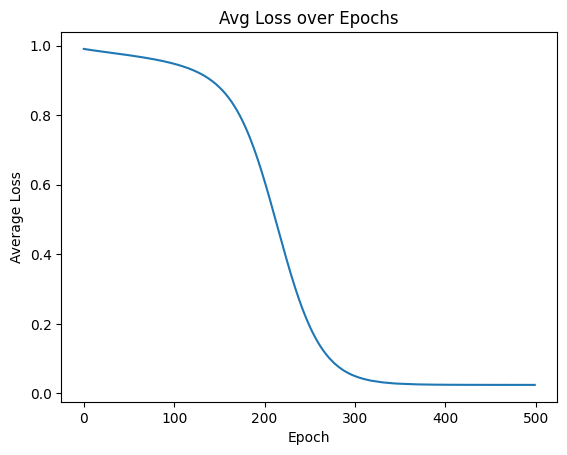

(1000, 2)


In [66]:
####### final 

output_dim = combined_tensor.shape[1] * combined_tensor.shape[2]

with torch.no_grad():
    mu, _, _ = model.encoder(train_dataset[:][0].view(len(train_dataset), -1))
    
class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

predictor = Predictor(latent_dim, output_dim)
optimizer = optim.SGD(predictor.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
    
n_epochs = 500
losses = []  # 추가된 부분: 각 epoch별 손실을 저장할 리스트

for epoch in range(n_epochs):
    total_loss = 0
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_data = predictor(latent_vars)
        
        # 손실 함수를 계산할 때 예측된 전체 데이터와 실제 전체 데이터를 사용합니다.
        loss = loss_fn(predicted_data, data)
        total_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)  # 추가된 부분: 계산된 avg_loss를 리스트에 추가
    print(f"Epoch [{epoch + 1}/{n_epochs}] - Avg Loss: {avg_loss:.4f}")

# 추가된 부분: 손실 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Avg Loss over Epochs')
plt.show()

predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for data_point in reshaped_data:
        mu, _, _ = model.encoder(data_point.unsqueeze(0))
        prediction = predictor(mu)
        predictions.append(prediction.squeeze().numpy())

predicted_data_numpy = np.array(predictions)
predicted_data_numpy = predicted_data_numpy.reshape(1000,10)
final_predicted_actions = predicted_data_numpy[:, :2]

replay(pd.DataFrame(final_predicted_actions))

In [72]:
predictions = []

with torch.no_grad():
    reshaped_data = valid_dataset[0][0].view(-1, 10000)
    for data_point in reshaped_data:
        mu, _, _ = model.encoder(data_point.unsqueeze(0))
        prediction = predictor(mu)
        predictions.append(prediction.squeeze().numpy())

predicted_data_numpy = np.array(predictions)
predicted_data_numpy = predicted_data_numpy.reshape(1000,10)
final_predicted_actions = predicted_data_numpy[:, :2]
print(final_predicted_actions.shape)
replay(pd.DataFrame(final_predicted_actions))

(1000, 2)


In [ ]:
# print(valid_dataset[0][0].shape)
print(model.encoder)
print(predictor)
print(predicted_data.shape)
print(data.shape)


In [ ]:
action_dim= action_df.shape[1]

class Predictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


predictor = Predictor(latent_dim, output_dim)  # output_dim은 예측하고자 하는 행동의 차원
optimizer = optim.Adam(predictor.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(n_epochs):
    for batch in train_loader:
        data = batch[0].view(len(batch[0]), -1)
        with torch.no_grad():
            latent_vars, _, _ = model.encoder(data)
        predicted_actions = predictor(latent_vars)
        
        # Assuming the actions are the first few columns of your data
        true_actions = data[:, :action_dim]
        
        loss = loss_fn(predicted_actions, true_actions)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [ ]:
with torch.no_grad():
    mu, _, _ = model.encoder(train_dataset[:][0].view(len(train_dataset), -1))
    predicted_train_actions = predictor(mu)
predicted_actions_numpy = predicted_train_actions.numpy()


# latent space plot

In [ ]:
# 예측할 action_t 샘플을 선택 (예: 테스트 데이터셋의 첫 번째 배치)
sample_action_t = next(iter(test_loader))[0][0].unsqueeze(0)  # 첫 번째 배치에서 첫 번째 샘플 선택

# 모델을 평가 모드로 설정
model.eval()

# 예측 수행 (재구성 손실 및 KL 발산은 여기서 무시)
with torch.no_grad():
    reconstructed_action_t1, _, _ = model(sample_action_t)

# reconstructed_action_t1은 action_t+1의 예측값입니다.
# 필요한 경우 이 값을 numpy 배열로 변환하거나 다른 형태로 가공할 수 있습니다.
predicted_action_t1 = reconstructed_action_t1.numpy()  # 예: numpy 배열로 변환


In [ ]:
import pandas as pd

def test_model(model, test_loader):
    model.eval()
    all_original_t1 = []
    all_predicted_t1 = []
    
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data, target_data = batch
            
            # Flatten the data if needed
            batch_data = batch_data.view(batch_data.size(0), -1)
            target_data = target_data.view(target_data.size(0), -1)

            reconstructed_batch, _, _ = model(batch_data)  # Predict action_{t+1}

            # Convert tensors to numpy arrays
            original_t1 = target_data.detach().cpu().numpy()
            predicted_t1 = reconstructed_batch.detach().cpu().numpy()

            all_original_t1.append(original_t1)
            all_predicted_t1.append(predicted_t1)

    # Convert to dataframes
    original_df = pd.DataFrame(np.vstack(all_original_t1))
    reconstructed_df = pd.DataFrame(np.vstack(all_predicted_t1))

    return original_df, reconstructed_df

# Assuming the test_loader contains pairs of (action_t, action_t+1)
original_df, reconstructed_df = test_model(model, test_loader)


# render with action

In [44]:

import torch

# Convert combined_arr to PyTorch Tensor
# combined_tensor = torch.from_numpy(combined_arr)

# Print the shape of combined_tensor
print(combined_tensor.shape)

import matplotlib.pyplot as plt
from IPython import display
import gym


def replay(combined_data):

    action_sp = combined_data.iloc[:, :2]
    obs_sp = combined_data.iloc[:, 2:]

    env = gym.make('Swimmer-v4', render_mode = 'human')

    # Iterate through the rows
    for i in range(len(action_sp)):
        # Get the i-th row
        action = action_sp.iloc[i]
        observation = obs_sp.iloc[i]
#         print(action)

        # If this is the first iteration, set the environment state to the given observation
        # Note: This assumes that the observation you've stored is the entire state that can be set with `env.reset()`
        # If this is not the case, you cannot simply set the environment state to the observation
        if i == 0:
            env.reset()  # We ignore the initial observation returned by `reset`

        # Apply the action
        next_observation, reward, done, trunc, info = env.step(action)
        # Render the environment
        env.render()
        # If you want to slow down each step for viewing, you can use time.sleep
        # time.sleep(0.01)

    # Close the environment
    env.close()


torch.Size([10000, 1000, 10])


# see the output

In [ ]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)


In [ ]:
original_df

In [ ]:
reconstructed_df

In [ ]:
# Get the first row from the dataframe
first_row_reco = reconstructed_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_reco_array = np.reshape(first_row_reco.values, (1000, 10))

# Convert it back to a dataframe
reshaped_df_reco = pd.DataFrame(reshaped_reco_array)
recon_combined_tensor = torch.tensor(reshaped_df_reco.values)


In [ ]:
replay(reshaped_df_reco)

In [65]:
replay(pd.DataFrame(final_predicted_actions))

In [57]:
predicted_data_numpy = pd.DataFrame(predicted_data_numpy)

replay(predicted_data_numpy)

In [ ]:
replay(reshaped_df_reco)

In [ ]:
# Get the first row from the dataframe
first_row_ori = original_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array_ori = np.reshape(first_row_ori.values, (1000, 10))

# Convert it back to a dataframe
reshaped_df_ori = pd.DataFrame(reshaped_array_ori)
ori_combined_tensor = torch.tensor(reshaped_df_ori.values)


In [ ]:
ori_combined_tensor[0]

In [ ]:
replay(reshaped_df_ori)

In [ ]:
# Flatten the tensors
flattened_ori = ori_combined_tensor.flatten()
flattened_recon = recon_combined_tensor.flatten()

# Calculate the Euclidean distance
euclidean_distance = torch.norm(flattened_ori - flattened_recon)


print(euclidean_distance)


In [ ]:
ori_combined_np = original_df.to_numpy()
recon_combined_np = reconstructed_df.to_numpy()

# Column names
column_names = ['action space : Torque applied on the first rotor', 
                'action space : Torque applied on the second rotor', 
                'obs0:angle of the front tip', 'obs1: angle of the first rotor', 
                'obs2: angle of the second rotor', 'obs3: velocity of the tip along the x-axis',
                'obs4: velocity of the tip along the y-axis', 'obs5: angular velocity of front tip',
                'obs6: angular velocity of first rotor', 'obs7: angular velocity of second rotor']

# Create a figure
plt.figure(figsize=(20, 20))

# Create subplots for each column
for i in range(10):  # Assuming you have 10 columns
    plt.subplot(5, 2, i+1)  # 5 rows and 2 columns of subplots
    plt.scatter(ori_combined_np[i, :], recon_combined_np[i, :], alpha=0.5, s=5)
    plt.title(column_names[i])
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
ori_combined_np.shape

In [ ]:
# Column names
column_names = ['action space : Torque applied on the first rotor', 
                'action space : Torque applied on the second rotor', 
                'obs0', 'obs1', 'obs2', 'obs3', 'obs4', 'obs5', 'obs6', 'obs7']

# Create a figure
plt.figure(figsize=(20, 20))

# Create subplots for each column
for i in range(10):  # Assuming you have 10 columns
    plt.subplot(5, 2, i+1)  # 5 rows and 2 columns of subplots
    plt.scatter(ori_combined_np[:, i], recon_combined_np[:, i], alpha=0.2)
    plt.title(column_names[i])
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Test

In [ ]:
# Get encoded representations (h values) for all data points
encoded_representations = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        _, _, h = model.encoder(batch_data)  # Get the encoded representation (h value) directly
        encoded_representations.append(h)

encoded_representations = torch.cat(encoded_representations, dim=0).numpy()

# Assuming the encoded representations are 2D, plot the data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_representations[:, 0], encoded_representations[:, 1], alpha=0.5, s=3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Encoded Representations (h values)')
plt.show()


In [ ]:
# Get encoded representations (h values) for all data points
encoded_representations = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        batch_data = batch[0]
        batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.float()
        _, _, h = model.encoder(batch_data)  # Get the encoded representation (h value) directly
        encoded_representations.append(h)

encoded_representations = torch.cat(encoded_representations, dim=0).numpy()

# Assuming the encoded representations are 2D, plot the data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_representations[:, 0], encoded_representations[:, 2], alpha=0.5, s=3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Visualization of Encoded Representations (h values)')
plt.show()


In [ ]:
model.eval()  # Evaluation mode
total_loss = 0
with torch.no_grad():
    for batch_data, target_data in test_loader:
        predicted_next_actions, _, _ = model(batch_data)
        loss = loss_fn(predicted_next_actions, target_data)  # Compare predicted T+1 with actual T+1
        total_loss += loss.item()

average_loss = total_loss / len(test_loader)
print(f'Mean Squared Error on Test Data: {average_loss}')
